In [1]:
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as pt

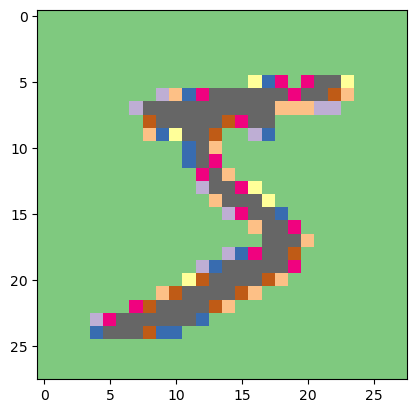

In [7]:
pt.imshow(xtrain[0],cmap='Accent')

In [8]:
ytrain[0]

5

In [11]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [12]:
model=keras.models.Sequential([
    Conv2D(40,kernel_size=7,activation='relu',padding='valid',input_shape=[28,28,1]),
    MaxPooling2D(pool_size=2,strides=2,padding='valid'),
    Conv2D(80,kernel_size=3,activation='relu',padding='valid'),
    MaxPooling2D(pool_size=2,strides=2,padding='valid'),
    Flatten(),
    Dense(300,activation='relu'),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

C:\Users\sunil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.8910 - loss: 1.1494
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9795 - loss: 0.0679
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9821 - loss: 0.0602
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9851 - loss: 0.0525
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9869 - loss: 0.0433
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9884 - loss: 0.0414
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9890 - loss: 0.0435
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9918 - loss: 0.0304
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9917 - loss: 0.0313
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9929 - loss: 0.0301


In [16]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9839 - loss: 0.0728


[0.05955394357442856, 0.9868000149726868]

In [17]:
predictions=model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
predictions[0]

array([8.8471611e-21, 2.9027057e-15, 1.1780297e-11, 5.6183650e-21,
       6.9262985e-23, 2.1240707e-22, 0.0000000e+00, 1.0000000e+00,
       7.6844849e-31, 7.9864577e-15], dtype=float32)

In [22]:
import numpy as np

In [25]:
np.argmax(predictions[0])

7

In [26]:
pred=np.argmax(predictions,axis=1)

In [27]:
pred[0]

7

In [28]:
cm=confusion_matrix(pred,ytest)

In [29]:
cm

array([[ 974,    0,    0,    0,    0,    2,    8,    0,    3,    1],
       [   0, 1126,    0,    0,    0,    1,    1,    1,    0,    0],
       [   1,    1, 1025,    0,    1,    0,    1,    6,    3,    1],
       [   0,    2,    1, 1007,    0,   10,    1,    0,    1,    1],
       [   0,    0,    1,    0,  954,    0,    5,    0,    0,    2],
       [   0,    0,    0,    2,    0,  875,    1,    0,    1,    4],
       [   2,    2,    0,    0,    3,    3,  939,    0,    4,    0],
       [   1,    3,    5,    0,    2,    1,    0, 1019,    0,    5],
       [   2,    1,    0,    1,    0,    0,    2,    0,  959,    5],
       [   0,    0,    0,    0,   22,    0,    0,    2,    3,  990]],
      dtype=int64)

In [30]:
import seaborn as sns

<Axes: >

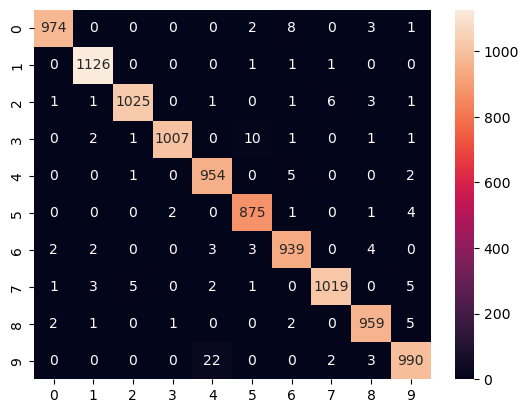

In [31]:
sns.heatmap(cm,annot=True,fmt='d')

In [32]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       988
           1       0.99      1.00      0.99      1129
           2       0.99      0.99      0.99      1039
           3       1.00      0.98      0.99      1023
           4       0.97      0.99      0.98       962
           5       0.98      0.99      0.99       883
           6       0.98      0.99      0.98       953
           7       0.99      0.98      0.99      1036
           8       0.98      0.99      0.99       970
           9       0.98      0.97      0.98      1017

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

